In [3]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
import warnings
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Use Seaborn's default style instead of the deprecated Matplotlib style
sns.set_style("whitegrid")

# Set up matplotlib for inline plotting in Jupyter notebooks
%matplotlib inline


In [5]:
# List input files
for dirname, _, filenames in os.walk('/kaggle/input/minor-p'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/minor-p/Fatigue Dataset for Steel.xlsx


In [6]:
# Load the dataset
df = pd.read_excel('/kaggle/input/minor-p/Fatigue Dataset for Steel.xlsx', engine='openpyxl')  

df.head()

# Basic information about the dataset
print(df.shape)
print(df.info())
print(df.describe().T)




(437, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl. No.   437 non-null    int64  
 1   NT        437 non-null    int64  
 2   THT       437 non-null    int64  
 3   THt       437 non-null    int64  
 4   THQCr     437 non-null    int64  
 5   CT        437 non-null    int64  
 6   Ct        437 non-null    float64
 7   DT        437 non-null    float64
 8   Dt        437 non-null    float64
 9   QmT       437 non-null    int64  
 10  TT        437 non-null    int64  
 11  Tt        437 non-null    int64  
 12  TCr       437 non-null    float64
 13  C         437 non-null    float64
 14  Si        437 non-null    float64
 15  Mn        437 non-null    float64
 16  P         437 non-null    float64
 17  S         437 non-null    float64
 18  Ni        437 non-null    float64
 19  Cr        437 non-null    float64
 20  Cu        437 non-null

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# Display the first few rows of the dataset
display(df.head())

# Basic information about the dataset
shape_df = pd.DataFrame([df.shape], columns=["Rows", "Columns"])
info_df = pd.DataFrame(df.dtypes, columns=["Data Type"])
describe_df = df.describe().T

# Display as tables
display(shape_df)
display(info_df)
display(describe_df)




,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


,Rows,Columns
0,437,27


,Data Type
Sl. No.,int64
NT,int64
THT,int64
THt,int64
THQCr,int64
CT,int64
Ct,float64
DT,float64
Dt,float64
QmT,int64


,count,mean,std,min,25%,50%,75%,max
Sl. No.,437.0,219.000000,126.295289,1.000,110.000,219.000,328.000,437.000
NT,437.0,872.299771,26.212073,825.000,865.000,870.000,870.000,930.000
THT,437.0,737.643021,280.036541,30.000,845.000,845.000,855.000,865.000
THt,437.0,25.949657,10.263824,0.000,30.000,30.000,30.000,30.000
THQCr,437.0,10.654462,7.841437,0.000,8.000,8.000,8.000,24.000
CT,437.0,128.855835,281.743539,30.000,30.000,30.000,30.000,930.000
Ct,437.0,40.502059,126.924697,0.000,0.000,0.000,0.000,540.000
DT,437.0,123.699844,267.128933,30.000,30.000,30.000,30.000,903.333
Dt,437.0,4.843936,15.700076,0.000,0.000,0.000,0.000,70.200
QmT,437.0,35.491991,19.419277,30.000,30.000,30.000,30.000,140.000


In [8]:
# Select the relevant columns
selected_columns = ["C", "Si", "Mn", "P", "S", "Ni", "Cr", "Cu", "Mo", "NT", "THT", "THt", 
                    "THQCr", "CT", "Ct", "DT", "Dt", "QmT", "TT", "Tt", "TCr", "RedRatio", "dA", "dB", "dC", "Fatigue"]
df = df[selected_columns]


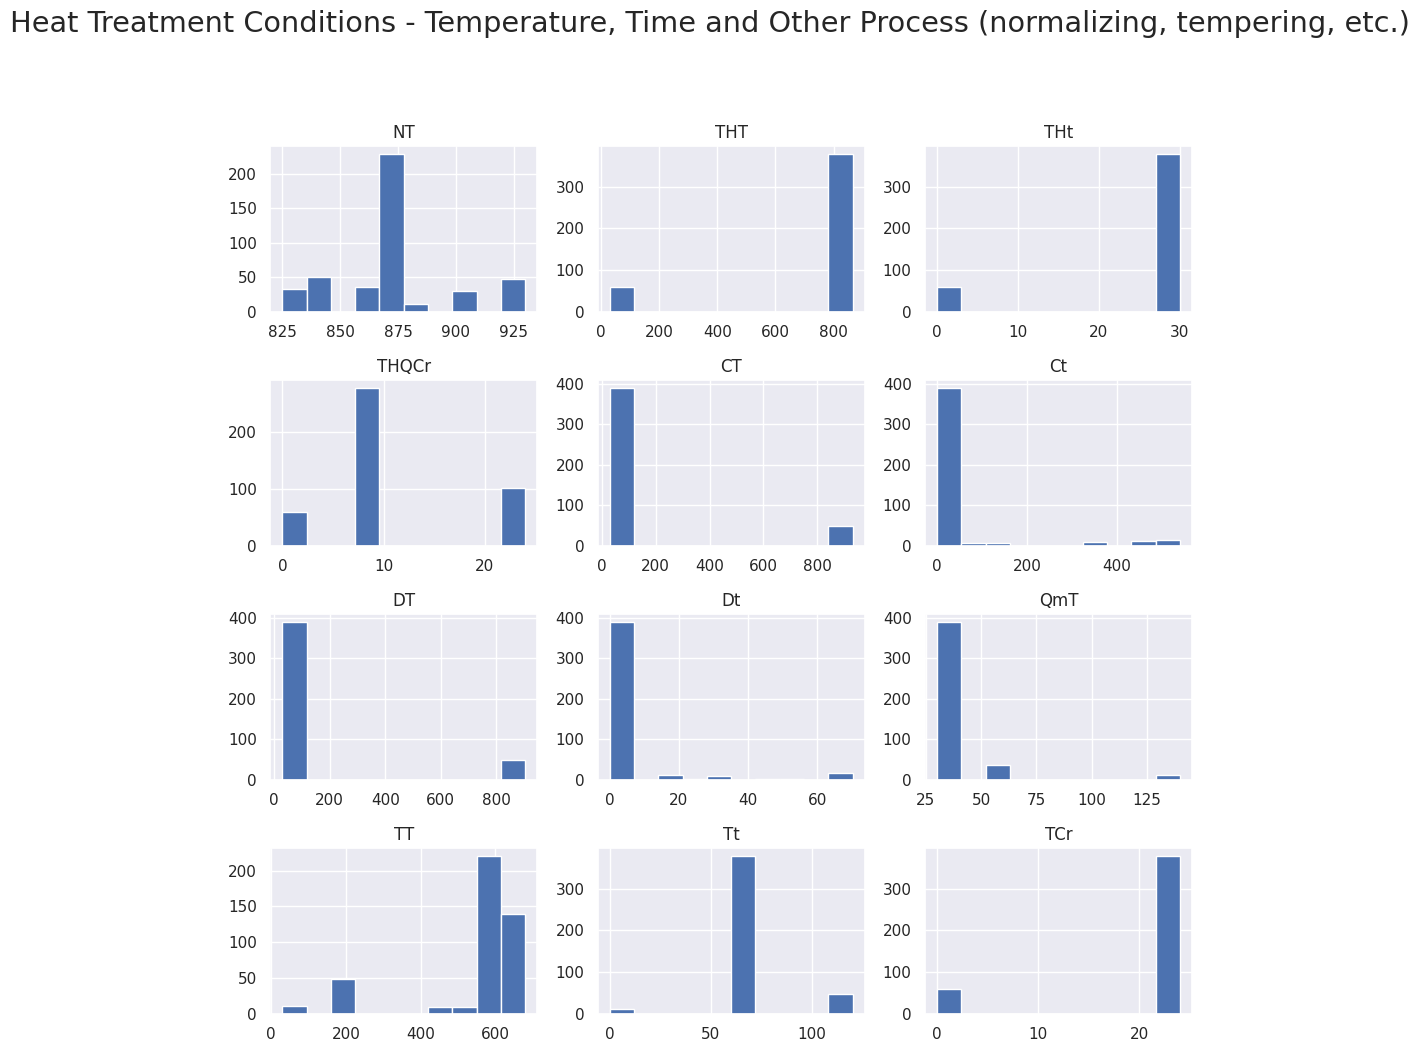

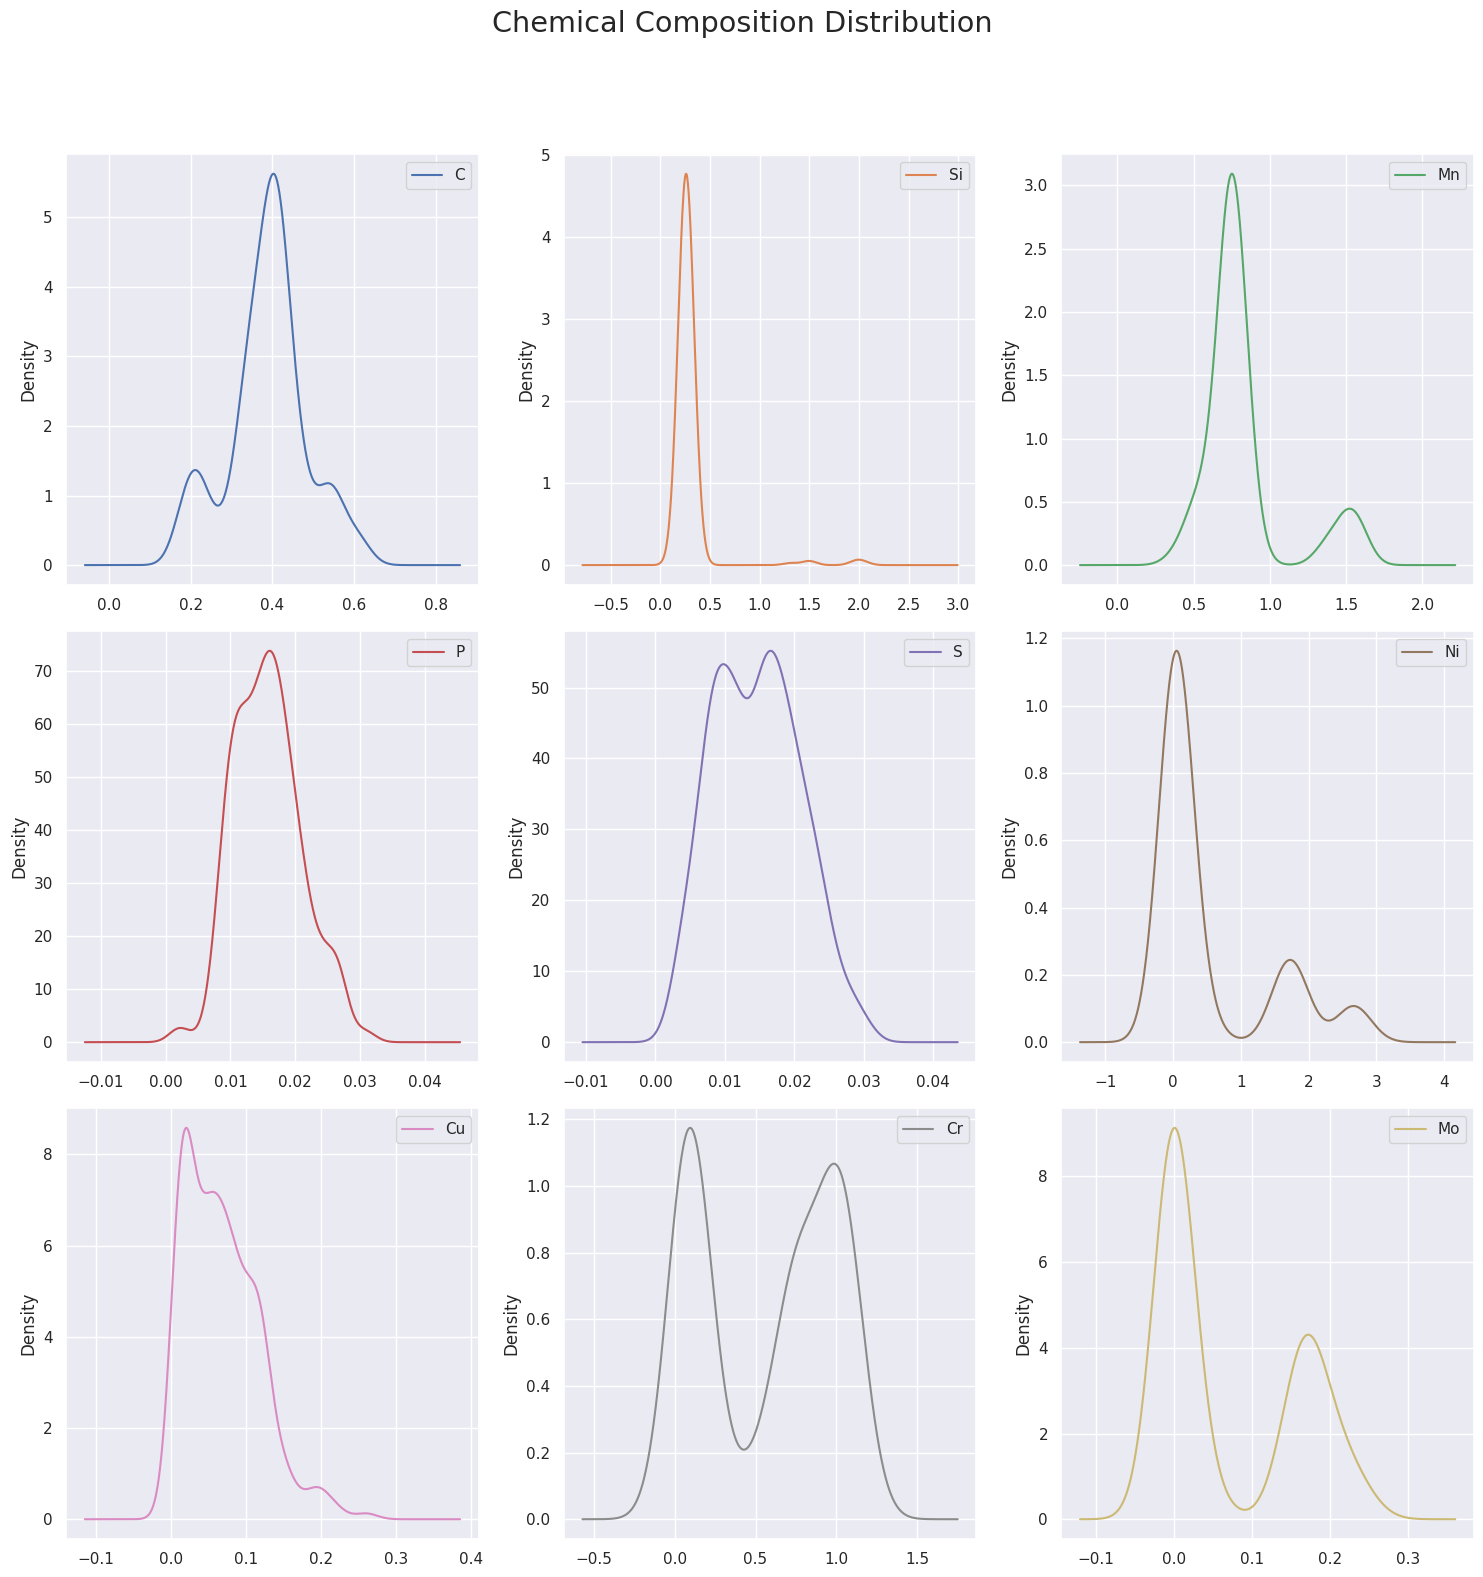

In [9]:
# Visualization
df_1 = df[["C", "Si", "Mn", "P", "S", "Ni", "Cu", "Cr", "Mo"]]
df_2 = df[['NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT','TT', 'Tt', 'TCr']]

sns.set(font_scale = 1)
df_2.hist(figsize=(10, 10))
plt.suptitle("Heat Treatment Conditions - Temperature, Time and Other Process (normalizing, tempering, etc.)",
             x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.tight_layout()
plt.show()

df_1.plot(kind="density", layout=(3, 3), subplots=True, sharex=False, sharey=False, figsize=(15, 15))
plt.suptitle("Chemical Composition Distribution",
             x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.tight_layout()
plt.show()


In [12]:
#prepareing the data for modeling 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = df.drop(["Fatigue"], axis=1)
y = df["Fatigue"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


Linear Regression - R2 value for Training model: 0.9571710993442313
Linear Regression - R2 value for Testing Model: 0.9340089728996366
Linear Regression - Train cross val RMSE: 34.81610417420258
Test cross val RMSE: 39.0656748440281


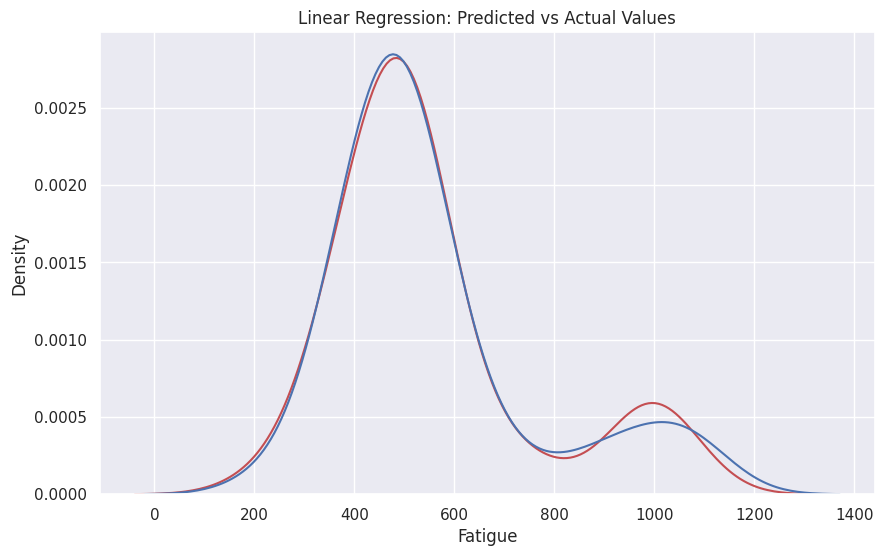

In [13]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lr_model = lm.fit(X_train, y_train)

# R^2 Score with Cross Validation
cross_val_score1 = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='r2').mean()
cross_val_score2 = cross_val_score(lr_model, X_test, y_test, cv=10, scoring='r2').mean()
print('Linear Regression - R2 value for Training model: ' + str(cross_val_score1))
print('Linear Regression - R2 value for Testing Model: ' + str(cross_val_score2))

# RMSE Score Value with Cross Validation
train_crs_val = np.sqrt(-cross_val_score(lr_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")).mean()
test_crs_val = np.sqrt(-cross_val_score(lr_model, X_test, y_test, cv=10, scoring="neg_mean_squared_error")).mean()
print("Linear Regression - Train cross val RMSE: {}\nTest cross val RMSE: {}".format(train_crs_val, test_crs_val))

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
ax1 = sns.distplot(lr_model.predict(X_test), hist=False, color="r", label="Predicted Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values", ax=ax1)
plt.title('Linear Regression: Predicted vs Actual Values')
plt.show()


KNN - R2 value for Training model: 0.8484953894446494
KNN - R2 value for Testing Model: 0.7111038658721205
KNN - Train cross val RMSE: 67.24927928475071
Test cross val RMSE: 82.63667648460611


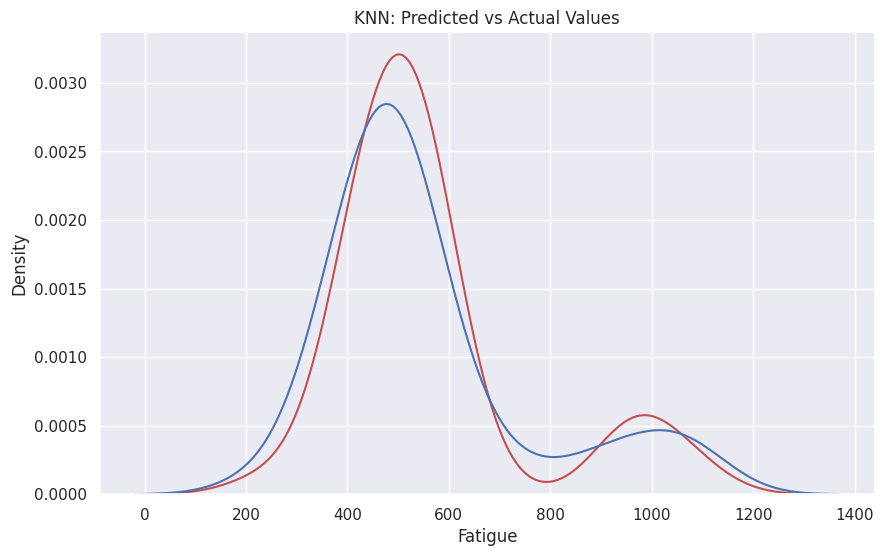

In [48]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn_model = knn.fit(X_train, y_train)

cross_val_score1 = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='r2').mean()
cross_val_score2 = cross_val_score(knn_model, X_test, y_test, cv=10, scoring='r2').mean()
print('KNN - R2 value for Training model: ' + str(cross_val_score1))
print('KNN - R2 value for Testing Model: ' + str(cross_val_score2))

train_crs_val = np.sqrt(-cross_val_score(knn_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")).mean()
test_crs_val = np.sqrt(-cross_val_score(knn_model, X_test, y_test, cv=10, scoring="neg_mean_squared_error")).mean()
print("KNN - Train cross val RMSE: {}\nTest cross val RMSE: {}".format(train_crs_val, test_crs_val))

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
ax2 = sns.distplot(knn_model.predict(X_test), hist=False, color="r", label="Predicted Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values", ax=ax2)
plt.title('KNN: Predicted vs Actual Values')
plt.show()


CatBoost - R2 value for Training model: 0.9793398654458108
CatBoost - R2 value for Testing Model: 0.9238413200056979
CatBoost - Train cross val RMSE: 24.968376652880515
Test cross val RMSE: 42.72555238999151


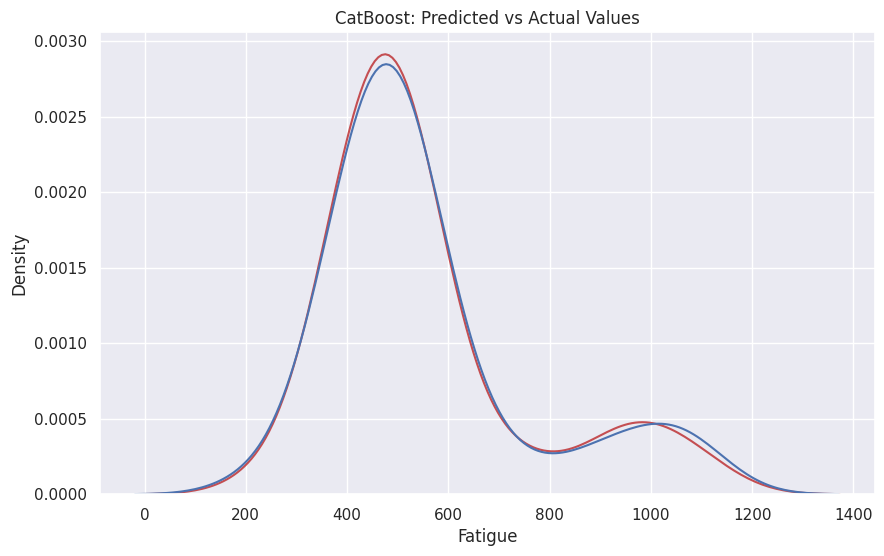

In [49]:
#CatBoost
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(X_train, y_train)

cross_val_score1 = cross_val_score(cat_model, X_train, y_train, cv=10, scoring='r2').mean()
cross_val_score2 = cross_val_score(cat_model, X_test, y_test, cv=10, scoring='r2').mean()
print('CatBoost - R2 value for Training model: ' + str(cross_val_score1))
print('CatBoost - R2 value for Testing Model: ' + str(cross_val_score2))

train_crs_val = np.sqrt(-cross_val_score(cat_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")).mean()
test_crs_val = np.sqrt(-cross_val_score(cat_model, X_test, y_test, cv=10, scoring="neg_mean_squared_error")).mean()
print("CatBoost - Train cross val RMSE: {}\nTest cross val RMSE: {}".format(train_crs_val, test_crs_val))

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
ax4 = sns.distplot(cat_model.predict(X_test), hist=False, color="r", label="Predicted Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values", ax=ax4)
plt.title('CatBoost: Predicted vs Actual Values')
plt.show()


In [44]:
# Compare the models based on R^2 score for the testing data
models = ['Linear Regression', 'KNN', 'CatBoost']
r2_scores = [cross_val_score2 for cross_val_score2 in [
    cross_val_score(lr_model, X_test, y_test, cv=10, scoring='r2').mean(),
    cross_val_score(knn_model, X_test, y_test, cv=10, scoring='r2').mean(),
    cross_val_score(cat_model, X_test, y_test, cv=10, scoring='r2').mean()
]]

# Print the comparison results
comparison_df = pd.DataFrame({'Model': models, 'R^2 Score': r2_scores})
comparison_df.sort_values(by='R^2 Score', ascending=False, inplace=True)
print(comparison_df)


               Model  R^2 Score
0  Linear Regression   0.934009
2           CatBoost   0.923841
1                KNN   0.711104


In [51]:
# Compare the models based on R^2 score for the testing data
models = ['Linear Regression', 'KNN', 'CatBoost']
r2_scores = [cross_val_score2 for cross_val_score2 in [
    cross_val_score(lr_model, X_test, y_test, cv=10, scoring='r2').mean(),
    cross_val_score(knn_model, X_test, y_test, cv=10, scoring='r2').mean(),
    cross_val_score(cat_model, X_test, y_test, cv=10, scoring='r2').mean()
]]

# Print the comparison results
comparison_df = pd.DataFrame({'Model': models, 'R^2 Score': r2_scores})
comparison_df.sort_values(by='R^2 Score', ascending=False, inplace=True)
print(comparison_df)


               Model  R^2 Score
0  Linear Regression   0.934009
2           CatBoost   0.923841
1                KNN   0.711104


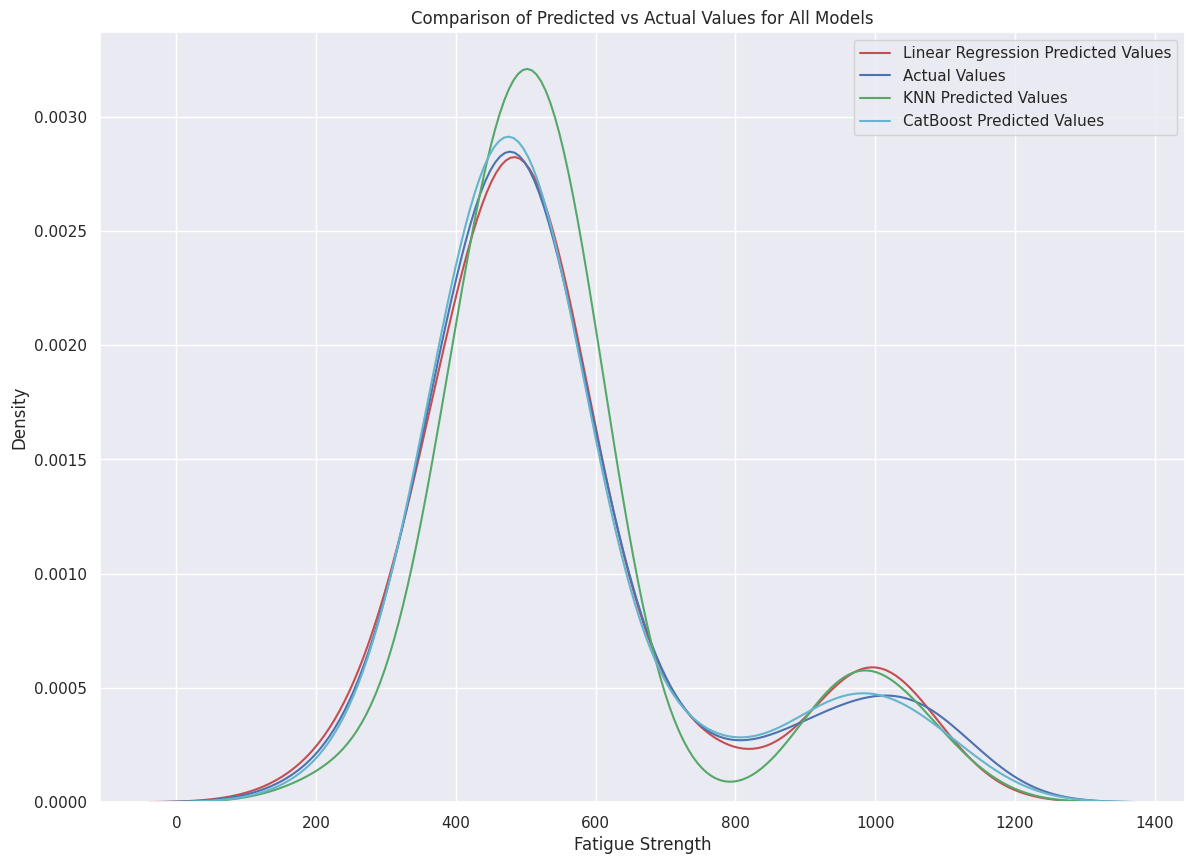

In [53]:
# Plot the predicted vs actual values for all models in a single plot

plt.figure(figsize=(14, 10))

# Linear Regression
sns.distplot(lr_model.predict(X_test), hist=False, color="r", label="Linear Regression Predicted Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values")

# KNN
sns.distplot(knn_model.predict(X_test), hist=False, color="g", label="KNN Predicted Values")


# CatBoost
sns.distplot(cat_model.predict(X_test), hist=False, color="c", label="CatBoost Predicted Values")

plt.title('Comparison of Predicted vs Actual Values for All Models')
plt.xlabel('Fatigue Strength')
plt.ylabel('Density')
plt.legend()
plt.show()
